<a href="https://colab.research.google.com/github/Arjun-P-Dinesh/Project_Formula1_prediction/blob/main/formula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
result_df = pd.read_csv('/content/drive/MyDrive/Formula1/results.csv')
stats_df = pd.read_csv('/content/drive/MyDrive/Formula1/status.csv')
drivers_df = pd.read_csv('/content/drive/MyDrive/Formula1/drivers.csv')
races_df = pd.read_csv('/content/drive/MyDrive/Formula1/races.csv')
constructor_df = pd.read_csv('/content/drive/MyDrive/Formula1/constructors.csv')
driver_standings_df = pd.read_csv('/content/drive/MyDrive/Formula1/driver_standings.csv')
pd.get_option("display.max_columns",None)

In [3]:
result_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
stats_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [5]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [6]:
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [7]:
constructor_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [8]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


# Feature extraction
here we are selecting and transforming relevant data from raw input to create a simplified

In [9]:
races_df['raceId']

0          1
1          2
2          3
3          4
4          5
        ... 
1096    1116
1097    1117
1098    1118
1099    1119
1100    1120
Name: raceId, Length: 1101, dtype: int64

In [10]:
races_df = races_df.raceId.astype(int)

⬇ here we are merging all seperate dataframe into single dataframe - df

In [11]:
con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
df = pd.merge(con4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [12]:
# checking of null values in df
df.isna().sum()

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time                 0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
url_x                0
driverStandingsId    0
raceId_y             0
points_y             0
position_y           0
positionText_y       0
wins                 0
constructorRef       0
name                 0
nationality_y        0
url_y                0
status               0
dtype: int64

In [13]:
#there's no null values in df

In [14]:
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537627 entries, 0 to 3537626
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time               object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  driverRef          object 
 19  number_y           object 
 20  code               object 
 21  forename           object 
 22  surname            object 
 23  dob                object 
 24  nationality_x      object 
 25  url_x             

In [16]:
#Describe the df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3537627.0,12630.091396,8209.508032,1.0,5125.0,11763.0,21140.0,26085.0
raceId_x,3537627.0,517.066570,331.536193,1.0,234.0,467.0,856.0,1110.0
driverId,3537627.0,204.182795,265.852299,1.0,20.0,105.0,229.0,858.0
constructorId,3537627.0,39.412151,56.860468,1.0,6.0,16.0,37.0,214.0
grid,3537627.0,9.763203,6.557031,0.0,4.0,9.0,15.0,34.0
positionOrder,3537627.0,11.229562,7.378775,1.0,5.0,10.0,17.0,39.0
points_x,3537627.0,2.998598,5.334331,0.0,0.0,0.0,4.0,50.0
laps,3537627.0,48.362040,25.123229,0.0,32.0,55.0,67.0,200.0
statusId,3537627.0,13.238133,22.544512,1.0,1.0,5.0,12.0,141.0
driverStandingsId,3537627.0,40117.463301,25309.272186,1.0,13856.0,49960.0,65824.0,72187.0


In [17]:
# droping unwanted columns
df = df.drop(['url_y','url_x','position_x','fastestLapTime','positionText_x','time','driverRef',
              'constructorRef','nationality_y','positionText_y','raceId_y','points_y'],1)

In [18]:
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,positionOrder,points_x,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,number_y,code,forename,surname,dob,nationality_x,driverStandingsId,position_y,wins,name,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


In [19]:
# changing of old column name to meaningful name
col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}
df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,forename,surname,dob,nationality,driverStandingsId,position,wins,name,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


In [20]:
# Adding two column (forename,surname) to create a single column called driver_name
df['driver_name'] = df['forename']+' '+df['surname']

In [21]:
df = df.drop(['forename','surname'],1)

In [22]:
# converting to date format from string
pd.to_datetime(df.dob)

0         1985-01-07
1         1985-01-07
2         1985-01-07
3         1985-01-07
4         1985-01-07
             ...    
3537622   1913-05-05
3537623   1913-05-05
3537624   1913-05-05
3537625   1913-05-05
3537626   1913-05-05
Name: dob, Length: 3537627, dtype: datetime64[ns]

In [23]:
df['dob'] = pd.to_datetime(df['dob'])

In [24]:
from datetime import datetime

In [25]:
# calculating driver's age and creating it as a new column
dates = datetime.today()-df['dob']
age = dates.dt.days/365

In [26]:
df['age'] = round(age)

In [27]:
pd.set_option('display.max_columns', None)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [28]:
# changing datatype
l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')
#errors='coerce' is used to handle any non-numeric values and convert them to NaN.

In [29]:
df.drop('driver_num',1,inplace=True) #1 - done on column, inplace=True - directly done on the dataframe

In [30]:
# seperating categorical and numerical columns for understading
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [31]:
df[cat].head()

,driver_code,nationality,name,status,driver_name
0,HAM,British,McLaren,Finished,Lewis Hamilton
1,HAM,British,McLaren,Finished,Lewis Hamilton
2,HAM,British,McLaren,Finished,Lewis Hamilton
3,HAM,British,McLaren,Finished,Lewis Hamilton
4,HAM,British,McLaren,Finished,Lewis Hamilton


In [32]:
df[num].head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,dob,driverStandingsId,position,wins,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,1,1,1,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,9,1,1,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,27,3,1,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,48,2,1,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,69,3,1,39.0


In [33]:
df.dtypes

resultId                          int64
racerId                           int64
driverId                          int64
constructorId                     int64
number                          float64
grid                              int64
positionOrder                     int64
points                          float64
laps                              int64
timetaken_in_millisec           float64
fastestLap                      float64
rank                            float64
max_speed                       float64
statusId                          int64
driver_code                      object
dob                      datetime64[ns]
nationality                      object
driverStandingsId                 int64
position                          int64
wins                              int64
name                             object
status                           object
driver_name                      object
age                             float64
dtype: object

In [34]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [35]:
df.isnull().sum() / len(df) * 100 #calculates the percentage of missing values in each column of the df

resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
number                    0.004523
grid                      0.000000
positionOrder             0.000000
points                    0.000000
laps                      0.000000
timetaken_in_millisec    61.421936
fastestLap               60.511100
rank                     59.513764
max_speed                60.511100
statusId                  0.000000
driver_code               0.000000
dob                       0.000000
nationality               0.000000
driverStandingsId         0.000000
position                  0.000000
wins                      0.000000
name                      0.000000
status                    0.000000
driver_name               0.000000
age                       0.000000
dtype: float64

In [36]:
df['max_speed'].mean() #average speed

204.02159408791888

In [37]:
df[['rank','fastestLap']] = df[['rank','fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)

In [38]:
df.isnull().sum() / len(df) * 100

resultId                 0.0
racerId                  0.0
driverId                 0.0
constructorId            0.0
number                   0.0
grid                     0.0
positionOrder            0.0
points                   0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
rank                     0.0
max_speed                0.0
statusId                 0.0
driver_code              0.0
dob                      0.0
nationality              0.0
driverStandingsId        0.0
position                 0.0
wins                     0.0
name                     0.0
status                   0.0
driver_name              0.0
age                      0.0
dtype: float64

In [39]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3537627.0,1.263009e+04,8209.508032,1.00,5.125000e+03,1.176300e+04,2.114000e+04,26085.00
racerId,3537627.0,5.170666e+02,331.536193,1.00,2.340000e+02,4.670000e+02,8.560000e+02,1110.00
driverId,3537627.0,2.041828e+02,265.852299,1.00,2.000000e+01,1.050000e+02,2.290000e+02,858.00
constructorId,3537627.0,3.941215e+01,56.860468,1.00,6.000000e+00,1.600000e+01,3.700000e+01,214.00
number,3537627.0,1.541915e+01,13.997266,0.00,6.000000e+00,1.200000e+01,2.100000e+01,208.00
grid,3537627.0,9.763203e+00,6.557031,0.00,4.000000e+00,9.000000e+00,1.500000e+01,34.00
positionOrder,3537627.0,1.122956e+01,7.378775,1.00,5.000000e+00,1.000000e+01,1.700000e+01,39.00
points,3537627.0,2.998598e+00,5.334331,0.00,0.000000e+00,0.000000e+00,4.000000e+00,50.00
laps,3537627.0,4.836204e+01,25.123229,0.00,3.200000e+01,5.500000e+01,6.700000e+01,200.00
timetaken_in_millisec,3537627.0,5.955319e+06,760797.157790,207071.00,5.955319e+06,5.955319e+06,5.955319e+06,15090540.00


Skewness

In [41]:
df.skew()

resultId                 0.108256
racerId                  0.218129
driverId                 1.567379
constructorId            1.930009
number                   2.317961
grid                     0.433818
positionOrder            0.461712
points                   2.331402
laps                    -0.107792
timetaken_in_millisec    4.249312
fastestLap               0.899760
rank                     1.481976
max_speed               -0.960649
statusId                 2.881861
driverStandingsId       -0.103283
position                 1.764488
wins                     3.868041
age                      0.471112
dtype: float64

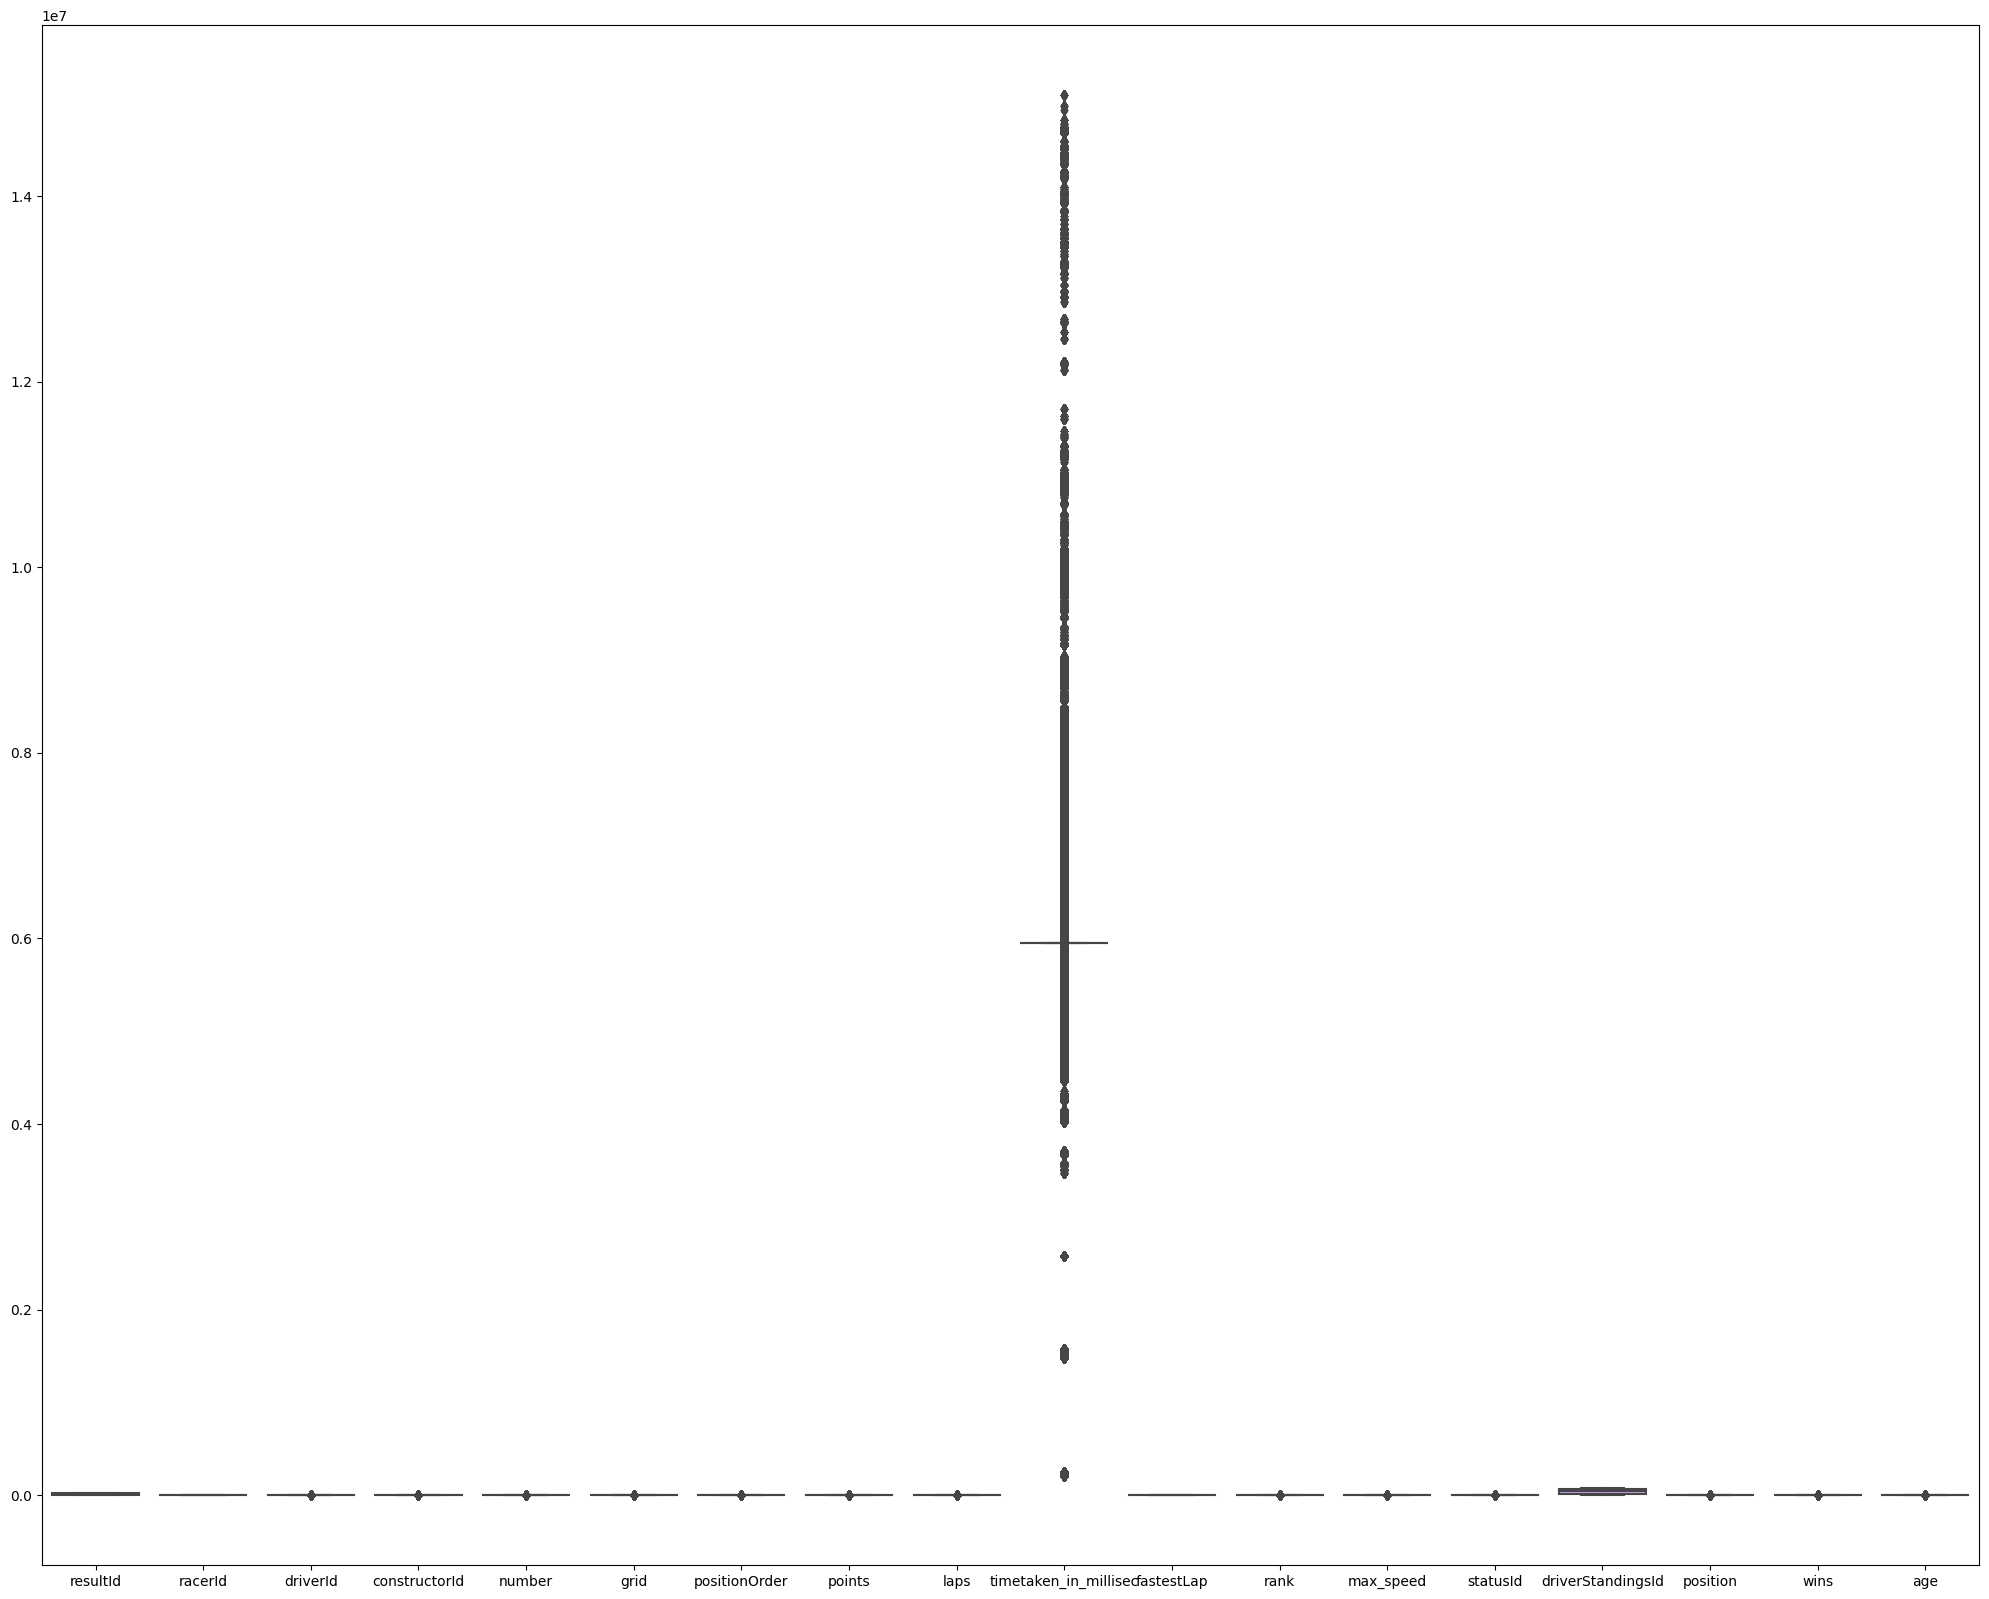

In [42]:
#visualize df using box plots
import seaborn as sns
plt.figure(figsize=(25,20))
sns.boxplot(data=df[num])
plt.show()

In [43]:
#remove timetaken_in_millisec
df2 = df.drop('timetaken_in_millisec', 1, inplace=True)

In [44]:
# Loop through each column and create a separate box plot
for column in num:
  plt.figure(figsize=(3,2))
  sns.boxplot(data=df2[column])
  plt.title(f"Box Plot of {column}")
  plt.show()

TypeError: ignored

<Figure size 300x200 with 0 Axes>